# read the data and the required libraries

In [2]:
import pandas as pd
import os
os.listdir()
import matplotlib.pyplot as plt
import numpy as np

In [4]:
train = pd.read_csv('data/Train.csv')
test  = pd.read_csv('data/Test.csv')
print(test.shape)
train.head(60)

(1202, 13)


,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,ID_0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0
1,ID_0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1
2,ID_005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0
3,ID_0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0
4,ID_00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,NaN,NaN,NaN,Lagos,Lagos,Muuve,1
5,ID_00D3EF6,2010-10-21,2011-10-20,Male,37,2010-10-21,2,NaN,NaN,NaN,NaN,NaN,Car Classic,0
6,ID_00HHZ8Y,2010-08-02,2011-08-01,Female,40,2010-08-02,3,NaN,NaN,NaN,Ikeja,Lagos,CVTP,0
7,ID_00M1X6U,2010-09-12,2011-09-11,Male,43,2010-09-12,1,Saloon,NaN,TOYOTA,NaN,NaN,CarSafe,0
8,ID_00N7XT1,2010-07-06,2011-07-05,Female,71,2010-07-06,2,JEEP,Black,REXTON,Badagry,Benue,Car Classic,0
9,ID_00QF156,2010-12-18,2011-12-17,Female,58,2010-12-18,1,NaN,NaN,NaN,Eti-Osa,Eti-Osa,Car Classic,0


In [5]:
train.shape

(12079, 14)

In [6]:
nul = train.isnull().sum().reset_index()
nul.columns = ["columnms","Nulls"]
nul["Percentage"] = [str(round(i,3))+ "%" for i in round(nul.Nulls/train.shape[0],3)*100]
nul


,columnms,Nulls,Percentage
0,ID,0,0.0%
1,Policy Start Date,0,0.0%
2,Policy End Date,0,0.0%
3,Gender,359,3.0%
4,Age,0,0.0%
5,First Transaction Date,0,0.0%
6,No_Pol,0,0.0%
7,Car_Category,3738,30.9%
8,Subject_Car_Colour,6962,57.6%
9,Subject_Car_Make,2476,20.5%


### Make a comment here: eg some variables have very high nulls (around 50%) eg Name and state of the respondent as well as car color and the car category

## clean the date columns

In [7]:
print(type(train["Policy Start Date"]))

<class 'pandas.core.series.Series'>


In [8]:
train["Policy Start Date"] = pd.DatetimeIndex(train["Policy Start Date"])
train["Policy End Date"] = pd.DatetimeIndex(train["Policy End Date"])

test["Policy Start Date"] = pd.DatetimeIndex(test["Policy Start Date"])
test["Policy End Date"] = pd.DatetimeIndex(test["Policy End Date"])

In [9]:
print(type(train["Policy Start Date"][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [10]:
print(type(train["Policy End Date"][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


# clean Gender

In [11]:
train['Gender'].value_counts()

Male            7617
Female          3327
Entity           277
Joint Gender     223
NOT STATED       175
NO GENDER         66
SEX               35
Name: Gender, dtype: int64

<AxesSubplot:ylabel='Gender'>

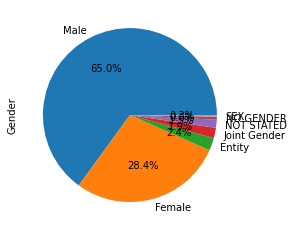

In [12]:
train['Gender'].value_counts().plot(kind = "pie", autopct='%1.1f%%')

In [13]:
train['Gender'].value_counts()

Male            7617
Female          3327
Entity           277
Joint Gender     223
NOT STATED       175
NO GENDER         66
SEX               35
Name: Gender, dtype: int64

In [14]:
clean = []

for i in train['Gender']:
    #print(i)
    if i == "Entity":
        clean.append(np.nan)
    elif i == 'NO GENDER':
        clean.append(np.nan)
    elif i == "SEX":
        clean.append(np.nan)
    elif i == 'NOT STATED':
        clean.append(np.nan)
    else:
        clean.append(i)

train['Gender'] = clean   

# test
clean = []

for i in test['Gender']:
    #print(i)
    if i == "Entity":
        clean.append(np.nan)
    elif i == 'NO GENDER':
        clean.append(np.nan)
    elif i == "SEX":
        clean.append(np.nan)
    elif i == 'NOT STATED':
        clean.append(np.nan)
    else:
        clean.append(i)

test['Gender'] = clean   

<AxesSubplot:ylabel='Gender'>

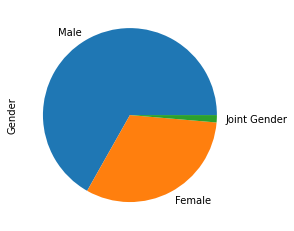

In [15]:
test["Gender"].value_counts().plot(kind = "pie")

# clean the no of policy 

<AxesSubplot:>

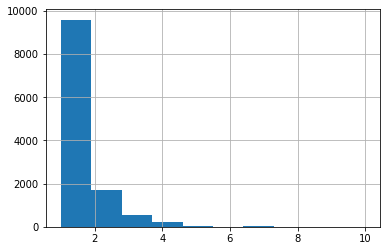

In [16]:
#train.No_Pol.value_counts().plot(kind = "barh")# the data is numeric so a histogram is best
train.head()
train.No_Pol.hist() # comment that a majority has just one policy with decreasing number of policies as the number increases.

In [17]:
train['No_Pol'].value_counts()# No cleaning required here

1     9580
2     1696
3      539
4      206
5       24
7       17
10       9
6        8
Name: No_Pol, dtype: int64

# Clean Age

In [18]:
train['Age'].unique()# A histogram here is also best though I also liked this

array([   30,    79,    43,     2,    20,    37,    40,    71,    58,
          45,    51,   120,    38,    81,    69,    31,    70,    34,
           1,    41,    47,    36,    46,    48,    39,    63,    42,
          27,    64,    50,    53,    33,    23,    32,    59,    60,
          52,    54,    44,    11,    78,    28,    29,    57,    12,
          65,    35,    73,    56,    55,    26,    49,    18,    14,
          62,    25,    61,    72,    82,    67,     7,    10,    68,
          21,    76,    24,    66,     3,    93,    22,    77,    19,
          80,     9,     6,   -76,    -2,    89,    74,    75,    84,
          16,    90,   140,     8,     5,    13,    86,    15,   320,
         -12,    83,    85, -6099, -5939,     4,   -22,   144,   112,
          17,     0,    88,   -27,    87,   133,   102,   -51,   128,
         -26,   100], dtype=int64)

<AxesSubplot:>

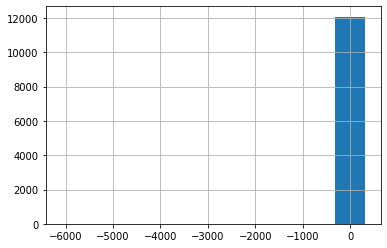

In [19]:
train['Age'].hist() # shows some negative numbers are present in the data

In [20]:
clean = []
for ages in train.Age:
    if ages <18:
        clean.append(np.nan)
    elif ages >100:
        clean.append(np.nan)
    else:
        clean.append(ages)
train['Age'] = clean
# test

clean = []
for ages in test.Age:
    if ages <18:
        clean.append(np.nan)
    elif ages >100:
        clean.append(np.nan)
    else:
        clean.append(ages)
test['Age'] = clean
        

<AxesSubplot:ylabel='Frequency'>

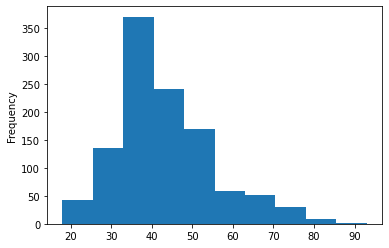

In [21]:
test['Age'].plot(kind = "hist")# the age now is between 18 and 100

# clean product name (Insurance name)

<AxesSubplot:>

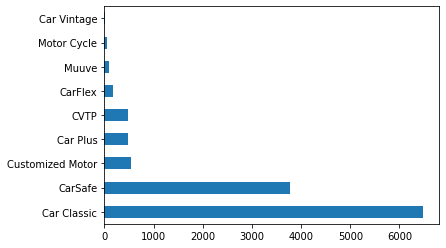

In [22]:
train['ProductName'].value_counts().plot(kind = "barh")

<AxesSubplot:ylabel='ProductName'>

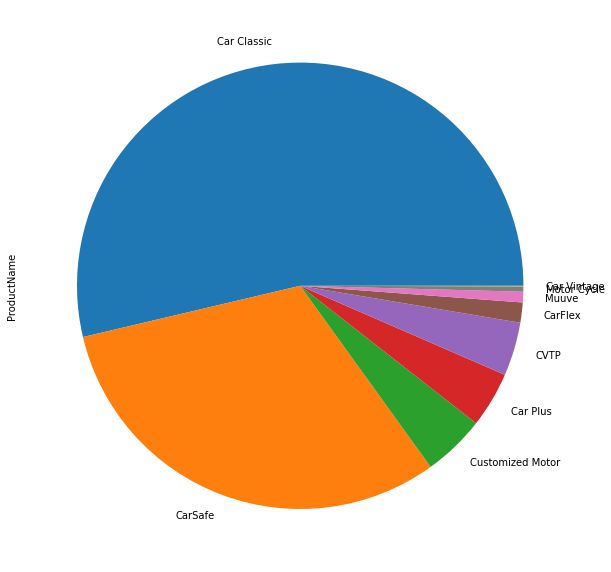

In [23]:
train['ProductName'].value_counts().plot(kind = "pie" , figsize = (10,11)) # No changes required here

# Car Category cleaning

In [24]:
train['Car_Category'].value_counts()

Saloon                     6034
JEEP                       2021
Truck                        97
Bus                          54
Mini Bus                     36
Pick Up                      30
Motorcycle                   17
Mini Van                     13
Sedan                        12
Wagon                        10
Shape Of Vehicle Chasis       6
Station 4 Wheel               5
Van                           3
Pick Up > 3 Tons              1
Tipper Truck                  1
CAMRY CAR HIRE                1
Name: Car_Category, dtype: int64

In [25]:
cars = []
for i in train['Car_Category']:
    #print(i)
    if i in ["CAMRY CAR HIRE","Sedan" ]:
        cars.append("Saloon")
    elif i in ['Mini Van','Mini Bus','Van']:
        cars.append("Bus")
    elif i in ["Pick Up > 3 Tons"]:
        cars.append("Pick Up")
    elif i in ["Shape Of Vehicle Chasis"]:
        cars.append(np.nan)
    elif i in ["Station 4 Wheel"]:
        cars.append(np.nan)
    else:
        cars.append(i)
train['Car_Category']=cars

# test

cars = []
for i in test['Car_Category']:
    #print(i)
    if i in ["CAMRY CAR HIRE","Sedan" ]:
        cars.append("Saloon")
    elif i in ['Mini Van','Mini Bus','Van']:
        cars.append("Bus")
    elif i in ["Pick Up > 3 Tons"]:
        cars.append("Pick Up")
    elif i in ["Shape Of Vehicle Chasis"]:
        cars.append(np.nan)
    elif i in ["Station 4 Wheel"]:
        cars.append(np.nan)
    else:
        cars.append(i)
test['Car_Category']=cars

<AxesSubplot:ylabel='Car_Category'>

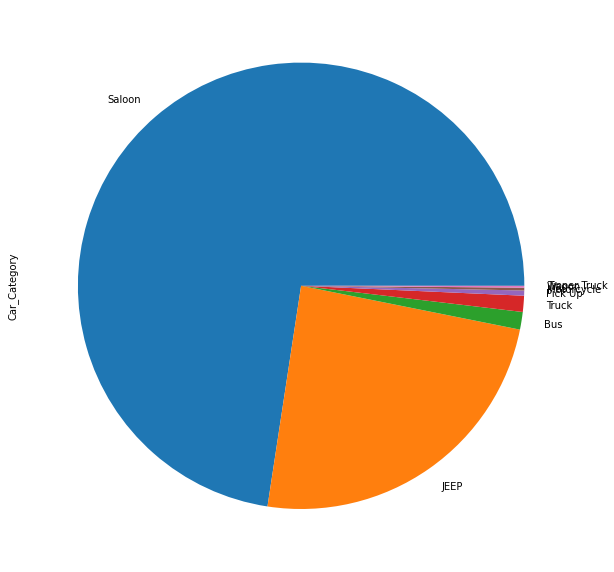

In [26]:
train['Car_Category'].value_counts().plot(kind = "pie", figsize = (10,11))

In [27]:
train.head(2)

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,ID_0040R73,2010-05-14,2011-05-13,Male,30.0,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0
1,ID_0046BNK,2010-11-29,2011-11-28,Female,79.0,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1


In [28]:
#Clean the colors

In [29]:
train["Subject_Car_Colour"].unique()

array(['Black', 'Grey', 'Red', nan, 'As Attached', 'Blue', 'Silver',
       'Green', 'Ash', 'White', 'Gray & Gray', 'Wine', 'Brown',
       'Red & Blue', 'Gold', 'Gray & Silver', 'Orange', 'Red & Black',
       'Dark Grey', 'White & Red', 'Light Green', 'Dark Gray', 'B.Silver',
       'Purple', 'Blue & Red', 'Red & Yellow', 'Yellow', 'Red & White',
       'D. Red', 'Dark Red', 'Black & White', 'White & Blue', 'Cream',
       'Dark Green', 'D. Gold', 'Champagne', 'Light Blue',
       'Blue&White&Red', 'White & Yellow', 'Dark Blue', 'Black & Orange',
       'Burgundy', 'Yellow & White', 'Beige Mitalic', 'Light Gray',
       'Blue Sky'], dtype=object)

In [30]:
train["Subject_Car_Colour"].value_counts()

Black             1880
Silver             554
Grey               514
As Attached        498
Blue               361
White              293
Red                251
Green              233
Gold               173
Ash                133
Wine                89
Brown               58
Cream                8
Yellow               8
Orange               5
White & Blue         5
Dark Gray            5
Purple               4
Red & White          4
D. Red               3
Blue & Red           3
Light Green          3
Dark Blue            2
White & Red          2
Black & White        2
Gray & Gray          2
Dark Grey            2
B.Silver             2
Gray & Silver        2
Black & Orange       2
Red & Black          2
Dark Red             1
Light Blue           1
Blue&White&Red       1
Red & Yellow         1
Champagne            1
Burgundy             1
Beige Mitalic        1
White & Yellow       1
Yellow & White       1
Red & Blue           1
D. Gold              1
Blue Sky             1
Light Gray 

<AxesSubplot:>

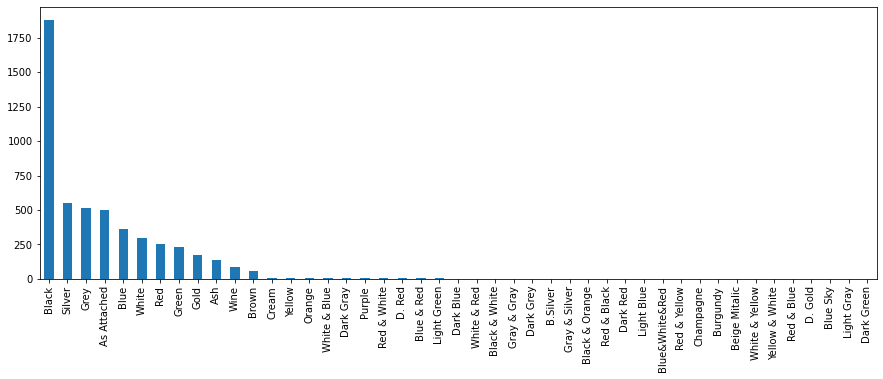

In [31]:
train["Subject_Car_Colour"].value_counts().plot(kind = "bar",figsize = (15,5))

In [32]:
color = []
for colour in train["Subject_Car_Colour"]:
    #print(i)
    if colour in ["D. Red" ]:
        color.append("Red")
    elif colour in ["D. Gold" ]:
        color.append("Gold")
    elif colour in ["B.Silver"]:
        color.append("Silver")
    elif colour in ["As Attached"]:
        color.append(np.nan)
    else:
        color.append(colour)
train["Subject_Car_Colour"]=color

# test

color = []
for colour in test["Subject_Car_Colour"]:
    #print(i)
    if colour in ["D. Red" ]:
        color.append("Red")
    elif colour in ["D. Gold" ]:
        color.append("Gold")
    elif colour in ["B.Silver"]:
        color.append("Silver")
    elif colour in ["As Attached"]:
        color.append(np.nan)
    else:
        color.append(colour)
test["Subject_Car_Colour"]=color

# Clean the car make

In [33]:
train["Subject_Car_Make"].unique()

array(['TOYOTA', nan, 'REXTON', 'Lexus', 'Hyundai', 'Iveco', 'DAF',
       'Honda', 'Mercedes', 'Jincheng', 'ACURA', 'Ford', 'Volkswagen',
       'Nissan', '.', 'Pontiac', 'Range Rover', 'Kia', 'Mitsubishi',
       'Scania', 'BMW', 'Infiniti', 'Renault', 'Volvo', 'Hummer', 'Mack',
       'Grand Cherokee', 'Porsche', 'Peugeot', 'Land Rover', 'Chevrolet',
       'Mazda', 'Man', 'Jeep', 'Audi', 'Suzuki', 'MINI COOPER', 'KA',
       'As Attached', 'Innson', 'Isuzu', 'Skoda', 'Jaguar', 'Chrysler',
       'Dodge', 'GMC', 'Land Rover.', 'Subaru', 'GAC', 'Fiat', 'Opel',
       'Astra', 'Motorcycle', 'ZOYTE', 'Seat', 'FOTON', 'Howo', 'Lincoln',
       'Rols Royce', 'CHANGAN', 'LIBERTY', 'ABG', 'Yamaha', 'Black',
       'Tata', 'Ashok Leyland', 'Geely', 'Caddillac', 'Wrangler Jeep',
       'Raston', 'MG', 'BRILLIANCE', 'Buik', 'COMMANDER', 'Bajaj'],
      dtype=object)

<AxesSubplot:>

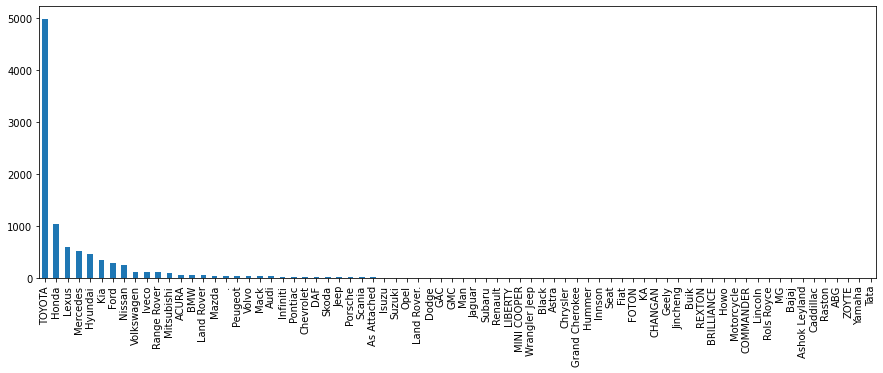

In [34]:
train["Subject_Car_Make"].value_counts().plot(kind = "bar",figsize = (15,5))

In [35]:
train["Subject_Car_Make"] = train["Subject_Car_Make"].astype(str)

In [36]:
car_names = []
for name in train["Subject_Car_Make"]:
    #name.lower()
    if name in ["."]:
        car_names.append(np.nan)
    elif name in ["As Attached"]:
        car_names.append(np.nan)
    else:
        car_names.append(name)
train["Subject_Car_Make"] = car_names

# test

car_names = []
for name in test["Subject_Car_Make"]:
    #name.lower()
    if name in ["."]:
        car_names.append(np.nan)
    elif name in ["As Attached"]:
        car_names.append(np.nan)
    else:
        car_names.append(name)
test["Subject_Car_Make"] = car_names
        
    

In [37]:
train["Subject_Car_Make"].unique()

array(['TOYOTA', 'nan', 'REXTON', 'Lexus', 'Hyundai', 'Iveco', 'DAF',
       'Honda', 'Mercedes', 'Jincheng', 'ACURA', 'Ford', 'Volkswagen',
       'Nissan', nan, 'Pontiac', 'Range Rover', 'Kia', 'Mitsubishi',
       'Scania', 'BMW', 'Infiniti', 'Renault', 'Volvo', 'Hummer', 'Mack',
       'Grand Cherokee', 'Porsche', 'Peugeot', 'Land Rover', 'Chevrolet',
       'Mazda', 'Man', 'Jeep', 'Audi', 'Suzuki', 'MINI COOPER', 'KA',
       'Innson', 'Isuzu', 'Skoda', 'Jaguar', 'Chrysler', 'Dodge', 'GMC',
       'Land Rover.', 'Subaru', 'GAC', 'Fiat', 'Opel', 'Astra',
       'Motorcycle', 'ZOYTE', 'Seat', 'FOTON', 'Howo', 'Lincoln',
       'Rols Royce', 'CHANGAN', 'LIBERTY', 'ABG', 'Yamaha', 'Black',
       'Tata', 'Ashok Leyland', 'Geely', 'Caddillac', 'Wrangler Jeep',
       'Raston', 'MG', 'BRILLIANCE', 'Buik', 'COMMANDER', 'Bajaj'],
      dtype=object)

<AxesSubplot:ylabel='LGA_Name'>

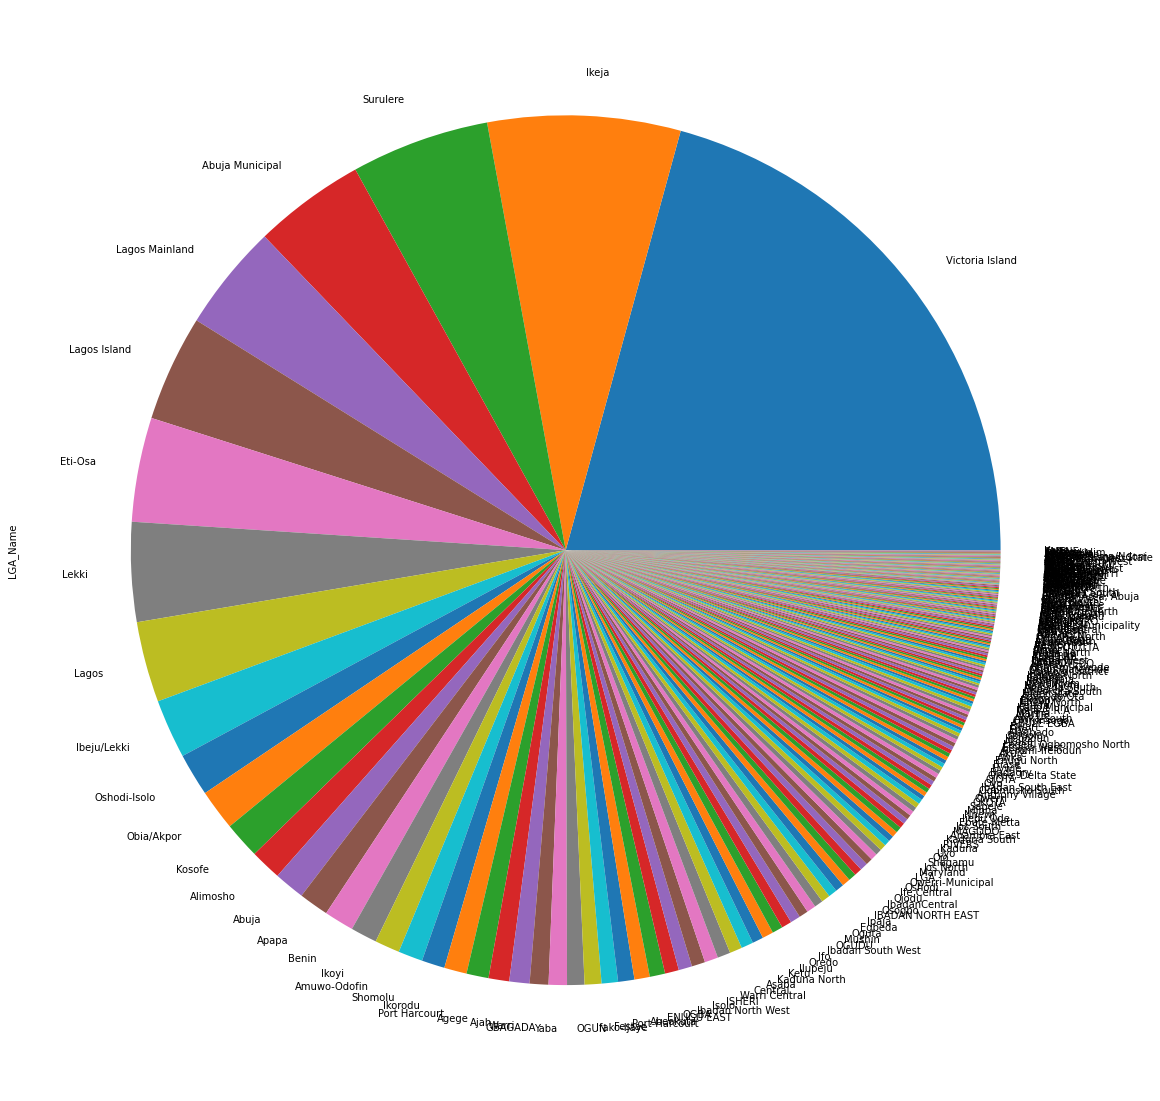

In [38]:
train["LGA_Name"].value_counts().plot(kind = "pie",figsize = (20,20))

In [39]:
train["LGA_Name"].value_counts()

Victoria Island    1162
Ikeja               401
Surulere            288
Abuja Municipal     232
Lagos Mainland      222
                   ... 
Ikwerre               1
Essien Udim           1
EMENE                 1
Keffi                 1
Kano                  1
Name: LGA_Name, Length: 258, dtype: int64

# clean the States

<AxesSubplot:>

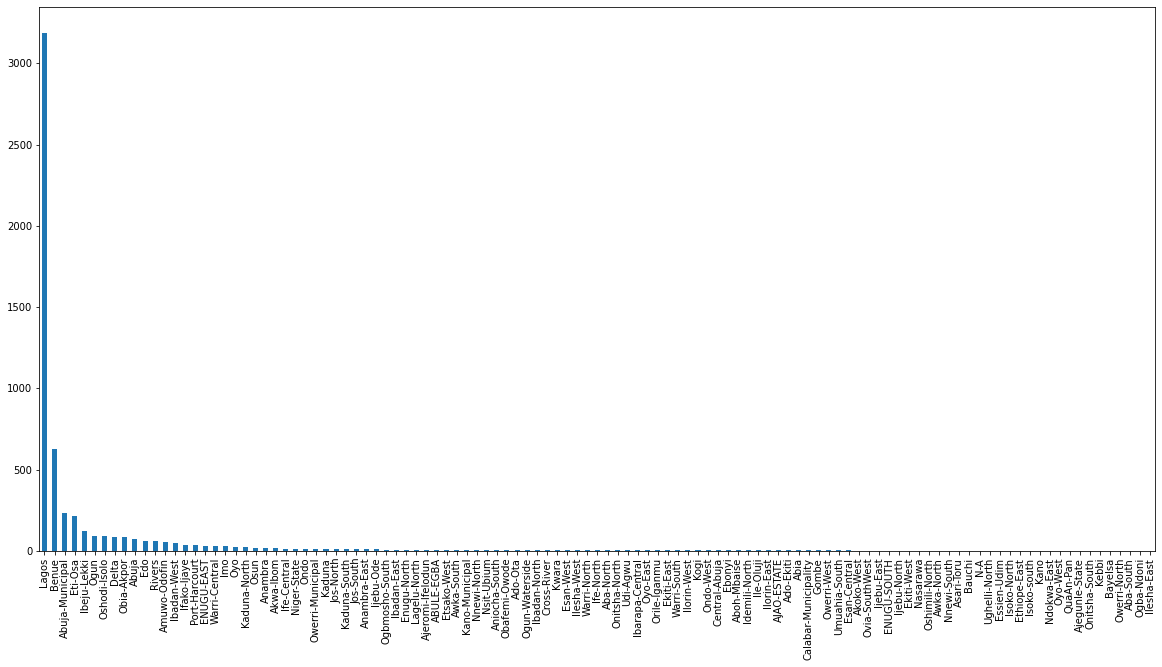

In [40]:
train["State"].value_counts().plot(kind = "bar",figsize = (20,10))

# Check the targets

In [41]:
train.target.value_counts() # this is a very imbalanced dataset

0    10624
1     1455
Name: target, dtype: int64

# research questions

* whats the corelation between insurance and all the variables
* does color corelate with insurance (particularly black, grey and white)
* is there any relationship between state/region and insurance claims

-  we should investigate this further in the bivariate analysis.

# the various data cleaning strategies

In [43]:
# the clean dataset
train.to_csv("clean_data/Cleaned_train_all.csv")
test.to_csv("clean_data/Cleaned_test_all.csv")
test.shape

(1202, 13)

In [44]:
# impute the nulls
train.isnull().sum()

def imputer(column):
    x = column.value_counts().reset_index().iloc[0][0]# identifies the mode of each column
    return x
train_v2 = train.copy()
for i in train_v2.columns:
    train_v2[i] = train_v2[i].fillna(imputer(train_v2[i]))
train_v2.isnull().sum() # imputted all the nulls
train_v2.to_csv("clean_data/cleaned_train_imputed.csv")





test_v2 = test.copy()
for i in test_v2.columns:
    test_v2[i] = test_v2[i].fillna(imputer(test_v2[i]))
test_v2.isnull().sum() # imputted all the nulls
test_v2.to_csv("clean_data/cleaned_test_imputed.csv")

In [45]:
# drop columns with over 50% nuls
print(train.isnull().sum())
nulls = ["Subject_Car_Colour","LGA_Name","State"]
train_v3 = train.copy()
for i in nulls:
    train_v3 = train_v3.drop(i,axis = 1)
    #print(train_v3.shape)
# now we drop nas
train_v3 = train_v3.dropna()
print(train_v3.shape)
train_v3.to_csv("clean_data/cleaned_train_removed50%null_columns.csv")



nulls = ["Subject_Car_Colour","LGA_Name","State"]
test_v3 = test.copy()
for i in nulls:
    test_v3 = test_v3.drop(i,axis = 1)
    #print(train_v3.shape)
# now we drop nas
test_v3 = test_v3.dropna()
print(test_v3.shape)
test_v3.to_csv("clean_data/cleaned_test_removed50%null_columns.csv")

ID                           0
Policy Start Date            0
Policy End Date              0
Gender                     912
Age                        931
First Transaction Date       0
No_Pol                       0
Car_Category              3749
Subject_Car_Colour        7460
Subject_Car_Make            55
LGA_Name                  6476
State                     6488
ProductName                  0
target                       0
dtype: int64
(7538, 11)
(753, 10)


In [46]:
# remove all the NAs
train_v4 = train.copy()
train_v4 = train_v4.dropna()
print(train_v4.shape)
train_v4.to_csv("clean_data/cleaned_train_removed_allnulls.csv")

# remove all the NAs
test_v4 = test.copy()
#test_v4 = test_v4.dropna()
print(test_v4.shape)
train_v4.to_csv("clean_data/cleaned_test_removed_allnulls.csv")

(2314, 14)
(1202, 13)


In [47]:
# collect some info on colors and state (then impute the rest)
train_v5 = train.copy()
# clean the colors
train.Subject_Car_Colour.unique()
useful = ['Black', 'Grey','White','Gray & Silver','Black & White']
train_v5["Mirage"] = [1 if i in useful  else 0 for i in train.Subject_Car_Colour ]
for i in nulls:
    train_v3 = train_v5.drop(i,axis = 1)
    #print(train_v3.shape)
# now we drop nas
train_v6 = train_v5.copy()
train_v5 = train_v5.dropna()

# dropna after including color
train_v5.to_csv("clean_data/cleaned_train_included_color_droped_nulls.csv")

# impute after including color
for i in train_v6.columns:
    train_v6[i] = train_v6[i].fillna(imputer(train_v6[i]))
train_v5.to_csv("clean_data/cleaned_train_included_color_imputed.csv")



# collect some info on colors and state (then impute the rest)
test_v5 = test.copy()
# clean the colors
test.Subject_Car_Colour.unique()
useful = ['Black', 'Grey','White','Gray & Silver','Black & White']
test_v5["Mirage"] = [1 if i in useful  else 0 for i in test.Subject_Car_Colour ]
for i in nulls:
    test_v3 = test_v5.drop(i,axis = 1)
    #print(train_v3.shape)
# now we drop nas
test_v6 = test_v5.copy()
#test_v5 = test_v5.dropna()

# dropna after including color
test_v5.to_csv("clean_data/cleaned_test_included_color_droped_nulls.csv")

# impute after including color
for i in test_v6.columns:
    test_v6[i] = test_v6[i].fillna(imputer(test_v6[i]))
test_v5.to_csv("clean_data/cleaned_test_included_color_imputed.csv")